# Separate the spectra in groups according to their behavior

Inicialmente os espectros serão agrupados como:
- G1: Dominado por starburts: sobe sempre para o azul
- G2: Sobe para o azul e um pouco para o vermelho
- G3: Grupo intermediário entre 2 e 4 
- G4: Sobe muito para o vermelho
- G5: Muito ruído; não possível de identificar visualmente; 
- G6: Erro na normalização

## Inspeção visual

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
## importing libraries
from functions import load_spectrum, plot_spectrum_ax, make_spectrum_panel, plot_overlaid_spectra
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
import pandas as pd

In [3]:
groups_df = pd.read_csv('groups.csv')
groups_df


,file,z,group
0,capers-cos07-v4_prism-clear_6368_43711.spec.fits,4.420440,G2
1,capers-cos10-v4_prism-clear_6368_119334.spec.fits,9.294025,G4
2,capers-cos10-v4_prism-clear_6368_30440.spec.fits,3.504500,G2
3,capers-cos10-v4_prism-clear_6368_32659.spec.fits,4.442170,G2
4,capers-cos13-v4_prism-clear_6368_160387.spec.fits,6.380030,G5
...,...,...,...
116,uncover-v4_prism-clear_2561_28876.spec.fits,7.036244,G2
117,uncover-v4_prism-clear_2561_38108.spec.fits,4.968462,G1
118,uncover-v4_prism-clear_2561_4286.spec.fits,5.835225,G2
119,uncover-v4_prism-clear_2561_45924.spec.fits,4.463361,G4


In [4]:
groups_df['group'].value_counts()

group
G2    44
G4    29
G1    22
G5    18
G3     5
G6     3
Name: count, dtype: int64

In [5]:
g1_df = groups_df[groups_df['group']=='G1']
g2_df = groups_df[groups_df['group']=='G2']
g3_df = groups_df[groups_df['group']=='G3']
g4_df = groups_df[groups_df['group']=='G4']

In [6]:
# Create a list of tuples to use with the functions
g1_zip = list(zip(g1_df['file'], g1_df['z']))
g2_zip = list(zip(g2_df['file'], g2_df['z']))
g3_zip = list(zip(g3_df['file'], g3_df['z']))
g4_zip = list(zip(g4_df['file'], g4_df['z']))

# Sort the lists by z
g1_zip_zsorted = sorted(g1_zip, key=lambda x: x[1])
g2_zip_zsorted = sorted(g2_zip, key=lambda x: x[1])
g3_zip_zsorted = sorted(g3_zip, key=lambda x: x[1])
g4_zip_zsorted = sorted(g4_zip, key=lambda x: x[1])

/home/bruna-araujo/Documentos/LRDs/functions/plot.py:315: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8, frameon=False)


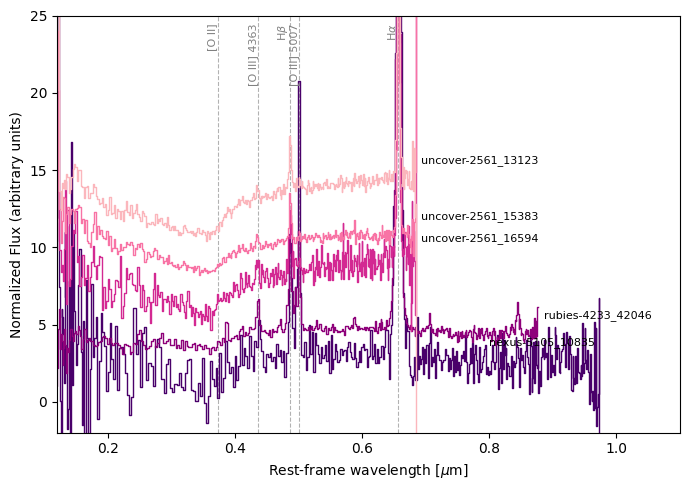

In [8]:
fig = plot_overlaid_spectra(
    g3_zip_zsorted,
    indices=range(0, 5),
    #offset=False,
    loader_kwargs=dict(
        input_flux_unit="uJy",
        wave_unit="um",
        restframe=True,
        normalize=True,
    ),
    xlim=(0.12, 1.1),
    ylim=(-2,25)
)
#plt.savefig('exemplos_grupos/gx_0.pdf')
plt.show()



In [8]:
## Mudando a ordem dos espectros para uma melhor visualização

def reorder_spec_info(spec_info, order):
    """
    Reorder spec_info based on a list of indices or filenames.
    """
    if isinstance(order[0], int):
        return [spec_info[i] for i in order]
    else:
        spec_dict = {fname: (fname, z) for fname, z in spec_info}
        return [spec_dict[name] for name in order]



In [9]:
order = [
    0,  6, 7, 5, 2, 3, 1, 4,
    8, 9, 11, 12, 13, 14, 15, 10,
    21, 19,  22,  16, 20, 23, 17, 18,  
    24, 25, 26, 29, 27, 28
]

g3_shape_sorted = reorder_spec_info(g3_zip_zsorted, order)

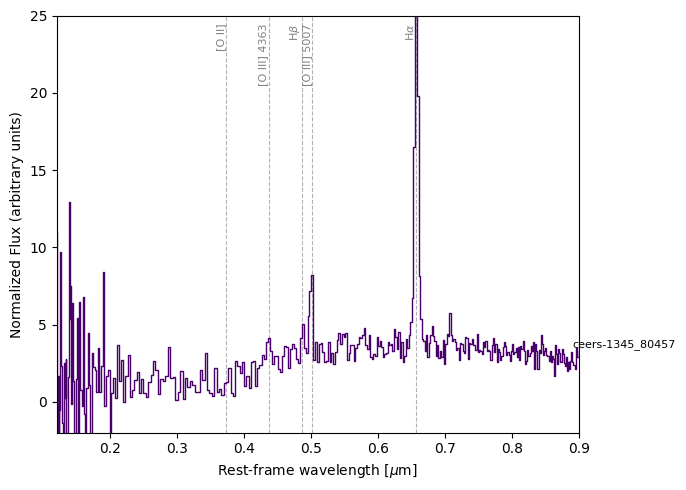

In [29]:
fig = plot_overlaid_spectra(
    g3_shape_sorted,
    indices=range(1, 2),
    #offset=False,
    figsize=(7,5),
    loader_kwargs=dict(
        input_flux_unit="uJy",
        wave_unit="um",
        restframe=True,
        normalize=True,
    ),
    xlim=(0.12, 0.9),
    ylim=(-2,25)
)
#plt.savefig('exemplos_grupos/g3_3.pdf')
plt.show()



## Grupo 4: Spectros com muito ruído

Usar uma função para fazer o smothing do spetro

/home/bruna-araujo/Documentos/LRDs/functions/plot.py:315: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8, frameon=False)


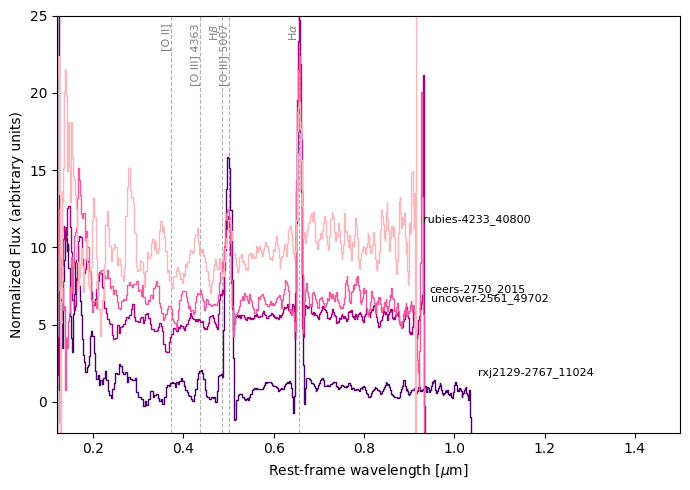

In [12]:
fig = plot_overlaid_spectra(
    g4_zip_zsorted,
    indices=range(0, 4),
    #offset=False,
    figsize=(7,5),
    loader_kwargs=dict(
        input_flux_unit="uJy",
        wave_unit="um",
        restframe=True,
        normalize=True,
        smooth= True,
    ),
    xlim=(0.12, 1.5),
    ylim=(-2,25)
)
#plt.savefig('exemplos_grupos/g3_3.pdf')
plt.show()

